# Test notebook for pastas with Pest Solver

In [1]:
from pathlib import Path
import pandas as pd

import pastas as ps
import pastas_plugins.pest as psp

%load_ext autoreload
%autoreload 2

In [2]:
head = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/head_nb1.csv",index_col="date", parse_dates=True)
    .squeeze()
)
prec = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/rain_nb1.csv", index_col="date", parse_dates=True)
    .squeeze()
)
evap = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/evap_nb1.csv", index_col="date", parse_dates=True)
    .squeeze()
)
pex = (prec - evap).dropna()

In [4]:
# make sure to run this on the pastas dev branch

ml = ps.Model(head)
sm = ps.StressModel(
    pex, ps.Exponential(), name="pno", settings=ps.rcParams["timeseries"]["evap"]
)
ml.add_stressmodel(sm)
pest_path = Path("pestf")
solver = psp.PestGlmSolver(
    exe_name="bin/pestpp-glm", model_ws=pest_path / "model", temp_ws=pest_path / "temp"
)
ml.solve(solver=solver, report=False)


2024-07-25 15:25:18.056636 starting: opening PstFrom.log for logging
2024-07-25 15:25:18.057539 starting PstFrom process
2024-07-25 15:25:18.057658 starting: setting up dirs
2024-07-25 15:25:18.057778 starting: removing existing new_d 'pestf/temp'
2024-07-25 15:25:18.074319 finished: removing existing new_d 'pestf/temp' took: 0:00:00.016541
2024-07-25 15:25:18.074497 starting: copying original_d 'pestf/model' to new_d 'pestf/temp'
2024-07-25 15:25:18.082100 finished: copying original_d 'pestf/model' to new_d 'pestf/temp' took: 0:00:00.007603
2024-07-25 15:25:18.084340 finished: setting up dirs took: 0:00:00.026682
2024-07-25 15:25:18.120618 transform was not passed, setting default tranform to 'log'
2024-07-25 15:25:18.120849 starting: adding grid type d style parameters for file(s) ['parameters_sel.csv']
2024-07-25 15:25:18.121003 starting: loading list-style pestf/temp/parameters_sel.csv
2024-07-25 15:25:18.121117 starting: reading list-style file: pestf/temp/parameters_sel.csv
2024-

<Axes: xlabel='date', ylabel='Head'>

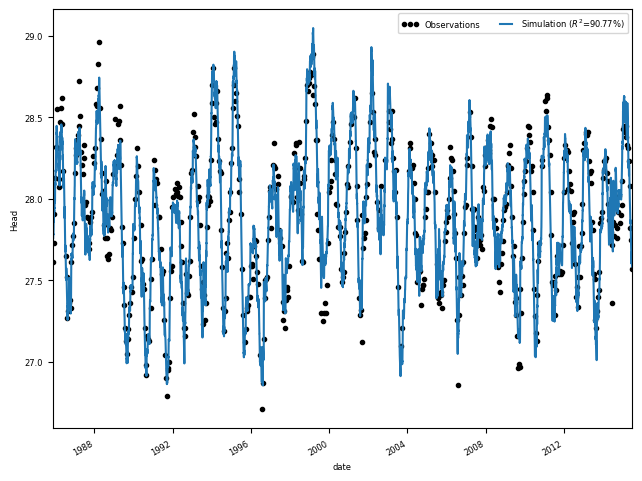

In [5]:
ml.plot()

In [6]:
ml.parameters

,initial,pmin,pmax,vary,name,dist,stderr,optimal
pno_A,215.674528,0.000010,21567.452806,True,pno,uniform,0.0,746.5460
pno_a,10.000000,0.010000,1000.000000,True,pno,uniform,0.0,148.5210
constant_d,27.900078,17.900078,37.900078,True,constant,uniform,0.0,27.5559


[<Axes: xlabel='date', ylabel='Head'>,
 <Axes: xlabel='date'>,
 <Axes: title={'right': "Stresses: ['None']"}, ylabel='Rise'>,
 <Axes: title={'center': 'Step response'}, xlabel='Time [days]'>,
 <Axes: title={'left': 'Model Parameters ($n_c$=3)'}>]

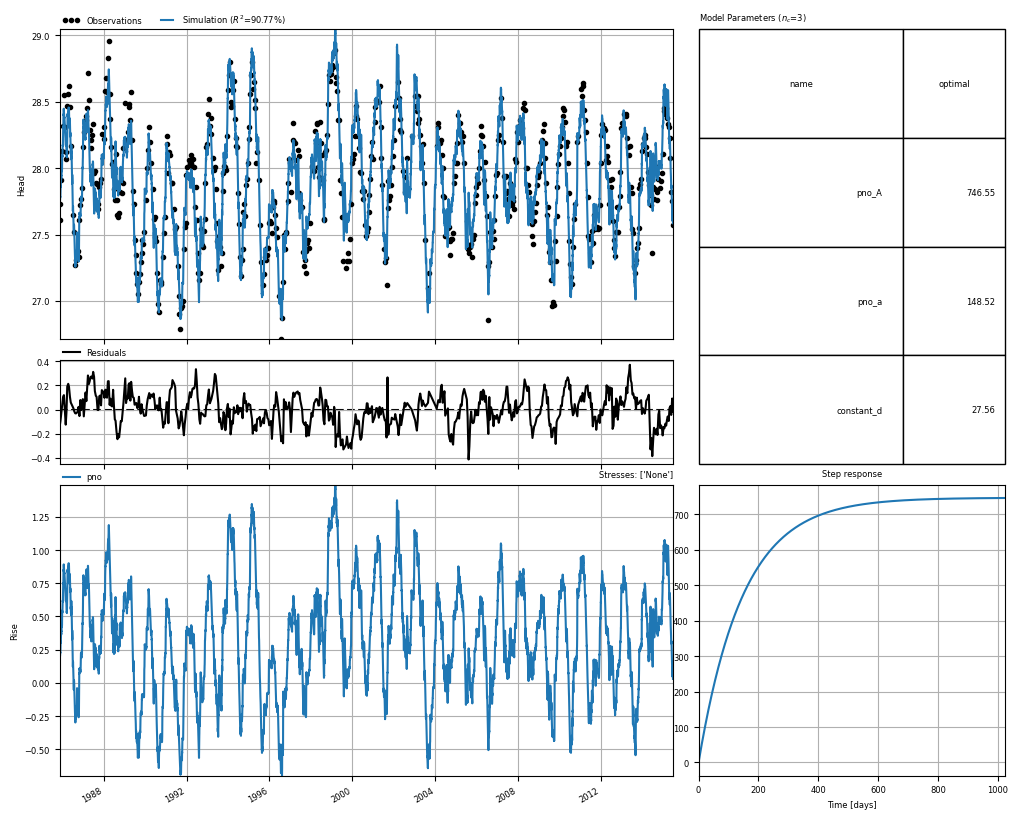

In [7]:
ml.plots.results()